In [55]:
import sys
import os

# include app-wide functions 
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('utils.py'))))
import utils

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
import pickle 
import random
import string
import json

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [7]:
df = utils.load_data()  # cleaned dataset

//anaconda/lib/python3.5/site-packages/bs4/__init__.py:336: UserWarning: "http://tinyurl.com/these-hats-are-damn-tradition" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
//anaconda/lib/python3.5/site-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
//anaconda/lib/python3.5/site-packages/bs4/__init__.py:273: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
//anaconda/lib/python3.5/site-packages/bs4/__init__.py:336: UserWarning: "http://www.e-castig.com/index.php?r=C1o6s" looks like a URL. Beautiful Soup is not an HTTP client. You shou

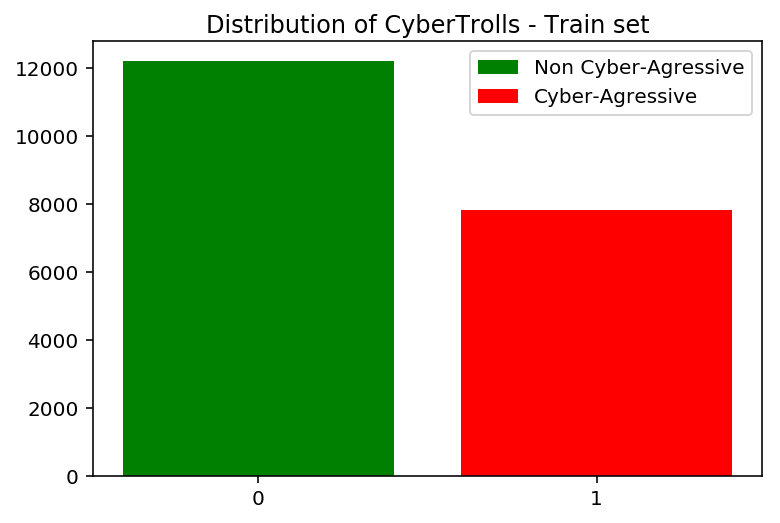

In [53]:
# distribution of cyber trolls vs non-cyber trolls
counter = Counter(df.label)
plt.title('Distribution of CyberTrolls - Train set')
plt.bar(list(counter.keys())[0], list(counter.values())[0], align='center', color='g', label='Non Cyber-Agressive')
plt.bar(list(counter.keys())[1], list(counter.values())[1], align='center', color='r', label='Cyber-Agressive')
plt.xticks(list(set(df.label)))
plt.legend()
plt.show()

In [38]:
# most common words by label
trolls = Counter(' '.join(list(df[df.label == 1].text)).split())
non_trolls = Counter(' '.join(list(df[df.label == 0].text)).split())

print('Cyber Trolls')
print(*trolls.most_common()[:5], sep='\n')
print('\nNon Cyber Trolls')
print(*non_trolls.most_common()[:5], sep='\n')

Cyber Trolls
('i', 2981)
('hate', 1313)
('damn', 1059)
('fuck', 1036)
('as', 1022)

Non Cyber Trolls
('i', 3839)
('hate', 1488)
('damn', 1307)
('im', 988)
('like', 942)


In [84]:
# transform text data
from sklearn.feature_extraction.text import TfidfVectorizer 

def build_encoder(text, count_vectorizer=None, tf_idf=None):
    """ builds a text feature extractor given an iterable of text data
    
    Parameters
    ---------------
        text: (list or series) of text data to transoform
        count_vectorizer: (bool) If `True` transforms into BoW model
        tf_idf: (bool) If `True` transforms into TF-IDF representation
    
    """
    
    if count_vectorizer:
        vectorizer = CountVectorizer()
        vectorizer.fit(text) 
        return vectorizer
    
    if tf_idf:
        transformer = TfidfVectorizer()
        transformer.fit(text)
        return transformer
            
## Save vectorizer in ./model_assets
#utils.persist_vectorizer(vectorizer, 'test_v.0.0')    

In [86]:
# bag-of-words encoding
enc = build_encoder(df.text, count_vectorizer=True)
count_vectorized = enc.fit_transform(df.text).toarray()


# tf-idf encoding
enc = build_encoder(df.text, tf_idf=True)
tf_idf = enc.fit_transform(df.text).toarray()


print(tf_idf.shape ==  count_vectorized.shape)

True


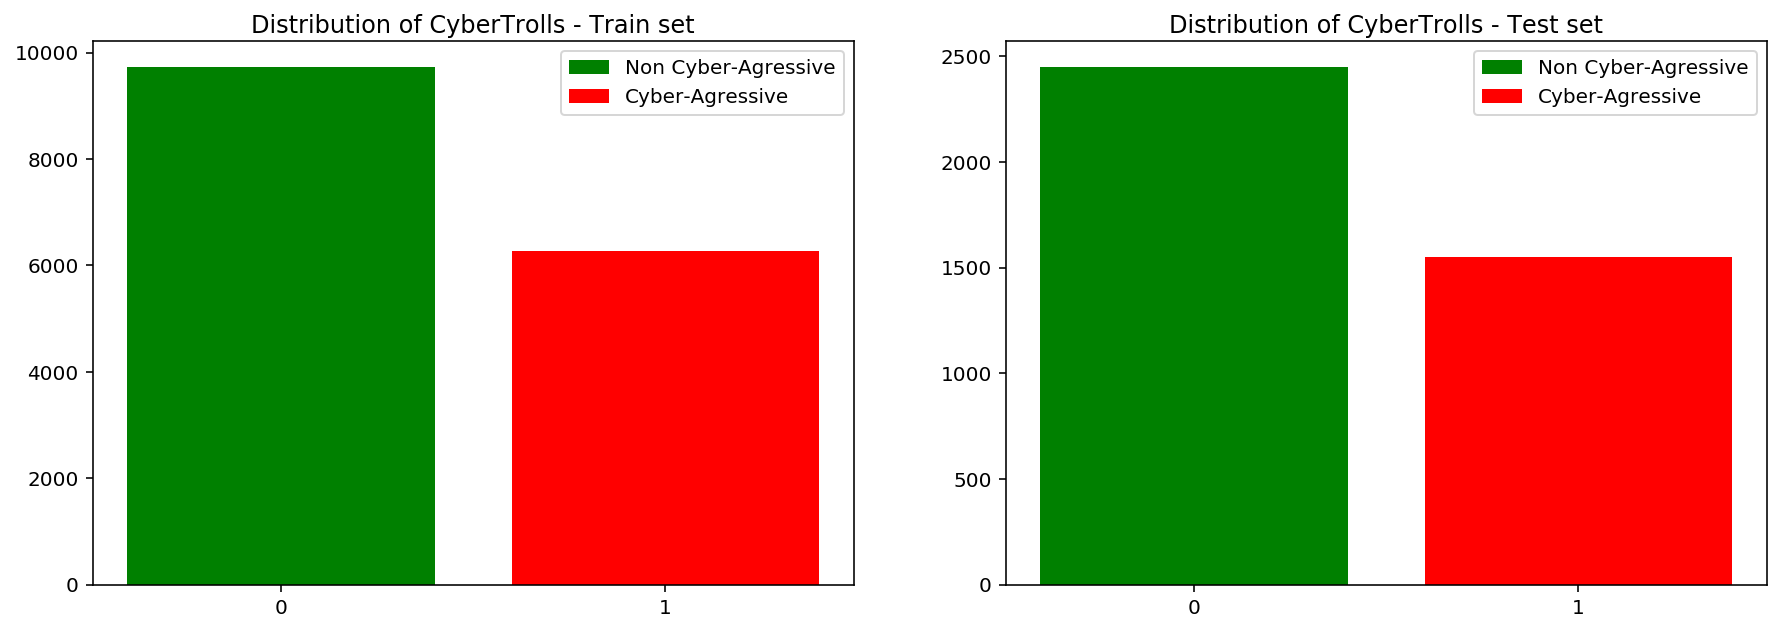

In [6]:
# Show of labels train/test sets
fig, axs = plt.subplots(1, 2, figsize=(15,5))

train_count = Counter(y_train)
axs[0].set_title('Distribution of CyberTrolls - Train set')
axs[0].bar(list(train_count.keys())[0], list(train_count.values())[0], align='center', color='g', label='Non Cyber-Agressive')
axs[0].bar(list(train_count.keys())[1], list(train_count.values())[1], align='center', color='r', label='Cyber-Agressive')
axs[0].set_xticks(list(set(y_train)))
axs[0].legend()

test_count = Counter(y_test)
axs[1].set_title('Distribution of CyberTrolls - Test set')
axs[1].bar(list(test_count.keys())[0], list(test_count.values())[0], align='center', color='g', label='Non Cyber-Agressive')
axs[1].bar(list(test_count.keys())[1], list(test_count.values())[1], align='center', color='r', label='Cyber-Agressive')
axs[1].set_xticks(list(set(y_test)))
axs[1].legend()

plt.show()

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

def logistic_model(X_train, X_test, y_train, y_test):

    clf = LogisticRegression(solver='saga', C=0.1, n_jobs=2, verbose=1, max_iter=500)
    clf.fit(X_train, y_train)

    print('{:>20s} {:.2f}'.format('Train Accuracy:', clf.score(X_train, y_train)))
    print('{:>20s} {:.2f}'.format('Test Accuracy:', clf.score(X_test, y_test)))
    confusion_matrix(y_test, clf.predict(X_test))
    
    return clf

X_train, X_test, y_train, y_test = train_test_split(tf_idf, df.label)
clf_tf_idf = logistic_model(X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = train_test_split(count_vectorized, df.label)
clf_tf_idf = logistic_model(X_train, X_test, y_train, y_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 22 epochs took 60 seconds
convergence after 20 epochs took 50 seconds


[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   50.0s finished


     Train Accuracy: 0.70
      Test Accuracy: 0.69


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 93 epochs took 235 seconds


[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:  3.9min finished


     Train Accuracy: 0.81
      Test Accuracy: 0.75


In [10]:
persist_model(clf, 'test_v.0.0')

Model Saved.
